In [23]:
#%matplotlib notebook

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.impute import KNNImputer

In [24]:
df=pd.read_csv("C:/Users/coich/Documents/TIDE/Celisse/projet_2/CC GENERAL.csv",sep=",")

In [25]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [26]:
(len(df),len(df["CUST_ID"].unique())) ### Ok il n'y a pas de doublons d'id dans la table

(8950, 8950)

In [27]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [69]:
df[df['CREDIT_LIMIT'].isna()].T
### on aurait pu penser qu'il n'y a pas de limite pour le crédit et qu'il s'agit d'un client VIP,
### visiblement non il manque juste l'info on va supprimer cette ligne (1/8950 c'est négligeable)


5203
CUST_ID                               C15349
BALANCE                            18.400472
BALANCE_FREQUENCY                   0.166667
PURCHASES                                0.0
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                      186.853063
PURCHASES_FREQUENCY                      0.0
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY              0.166667
CASH_ADVANCE_TRX                           1
PURCHASES_TRX                              0
CREDIT_LIMIT                             NaN
PAYMENTS                            9.040017
MINIMUM_PAYMENTS                   14.418723
PRC_FULL_PAYMENT                         0.0
TENURE                                     6

In [30]:
df[df['MINIMUM_PAYMENTS'].isna()].describe().T

count         mean          std    min  \
BALANCE                           313.0   555.441321  1292.687887    0.0   
BALANCE_FREQUENCY                 313.0     0.389403     0.408341    0.0   
PURCHASES                         313.0   393.087284   757.905701    0.0   
ONEOFF_PURCHASES                  313.0   250.433387   624.453991    0.0   
INSTALLMENTS_PURCHASES            313.0   142.653898   311.289043    0.0   
CASH_ADVANCE                      313.0   559.136698  1185.132567    0.0   
PURCHASES_FREQUENCY               313.0     0.336043     0.372517    0.0   
ONEOFF_PURCHASES_FREQUENCY        313.0     0.107886     0.227370    0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  313.0     0.244670     0.359756    0.0   
CASH_ADVANCE_FREQUENCY            313.0     0.067169     0.130087    0.0   
CASH_ADVANCE_TRX                  313.0     1.460064     3.182359    0.0   
PURCHASES_TRX                     313.0     5.833866     9.600908    0.0   
CREDIT_LIMIT                      313.0  3731.789137  2924.606153  500.0   
PAYMENTS                          313.0   322.286168  1996.658905    0.0   
MINIMUM_PAYMENTS                    0.0          NaN          NaN    NaN   
PRC_FULL_PAYMENT                  313.0     0.000000     0.000000    0.0   
TENURE                            313.0    11.063898     1.869734    6.0   

                                          25%          50%          75%  \
BALANCE                              0.187069    16.848358   286.686616   
BALANCE_FREQUENCY                    0.090909     0.181818     1.000000   
PURCHASES                            1.400000   130.400000   399.950000   
ONEOFF_PURCHASES                     0.000000     0.000000   176.030000   
INSTALLMENTS_PURCHASES               0.000000     0.000000   152.280000   
CASH_ADVANCE                         0.000000     0.000000   480.104401   
PURCHASES_FREQUENCY                  0.083333     0.166667     0.583333   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000     0.416667   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.083333   
CASH_ADVANCE_TRX                     0.000000     0.000000     1.000000   
PURCHASES_TRX                        1.000000     2.000000     8.000000   
CREDIT_LIMIT                      1500.000000  3000.000000  5000.000000   
PAYMENTS                             0.000000     0.000000     0.000000   
MINIMUM_PAYMENTS                          NaN          NaN          NaN   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.000000   
TENURE                              12.000000    12.000000    12.000000   

                                           max  
BALANCE                            9164.724752  
BALANCE_FREQUENCY                     1.000000  
PURCHASES                          7597.090000  
ONEOFF_PURCHASES                   6761.290000  
INSTALLMENTS_PURCHASES             2959.240000  
CASH_ADVANCE                       7616.064965  
PURCHASES_FREQUENCY                   1.000000  
ONEOFF_PURCHASES_FREQUENCY            1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CASH_ADVANCE_FREQUENCY                1.000000  
CASH_ADVANCE_TRX                     21.000000  
PURCHASES_TRX                        77.000000  
CREDIT_LIMIT                      19500.000000  
PAYMENTS                          29272.486070  
MINIMUM_PAYMENTS                           NaN  
PRC_FULL_PAYMENT                      0.000000  
TENURE                               12.000000

In [31]:
df_num=df.drop(columns=["CUST_ID"])
scaler=StandardScaler()
df_wo_na=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)
df_wo_na.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean   4.195651e-16       1.209548e-14 -9.278518e-16      3.916048e-15   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.516398e-01      -3.703271e+00 -4.695519e-01     -3.569340e-01   
25%   -6.900078e-01       4.904486e-02 -4.510006e-01     -3.569340e-01   
50%   -3.320286e-01       5.180838e-01 -3.004541e-01     -3.340396e-01   
75%    2.352559e-01       5.180838e-01  5.004652e-02     -9.056763e-03   
max    8.397489e+00       5.180838e-01  2.248351e+01      2.420107e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             2.275424e-15  5.697020e-15        -3.716084e-16   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.545762e-01 -4.667856e-01        -1.221758e+00   
25%             -4.545762e-01 -4.667856e-01        -1.014125e+00   
50%             -3.561562e-01 -4.667856e-01         2.404259e-02   
75%              6.366321e-02  6.435242e-02         1.062211e+00   
max              2.442689e+01  2.201112e+01         1.269843e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.950000e+03                      8.950000e+03   
mean                 2.021052e-15                      2.353921e-16   
std                  1.000056e+00                      1.000056e+00   
min                 -6.786608e-01                     -9.169952e-01   
25%                 -6.786608e-01                     -9.169952e-01   
50%                 -3.993193e-01                     -4.976286e-01   
75%                  3.269728e-01                      9.701506e-01   
max                  2.673451e+00                      1.599199e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.950000e+03      8.950000e+03   8.950000e+03  8.949000e+03   
mean             5.856519e-16     -7.151821e-16  -3.570713e-15 -7.897483e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.753489e-01     -4.760698e-01  -5.917959e-01 -1.221468e+00   
25%             -6.753489e-01     -4.760698e-01  -5.515646e-01 -7.954817e-01   
50%             -6.753489e-01     -4.760698e-01  -3.101767e-01 -4.107196e-01   
75%              4.351492e-01      1.100739e-01   9.213645e-02  5.511855e-01   
max              6.820521e+00      1.754785e+01   1.381101e+01  7.009692e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.950000e+03      8.637000e+03      8.950000e+03  8.950000e+03  
mean  -3.264056e-16     -7.678496e-17     -2.199184e-15  1.556446e-14  
std    1.000056e+00      1.000058e+00      1.000056e+00  1.000056e+00  
min   -5.986883e-01     -3.642811e-01     -5.255510e-01 -4.122768e+00  
25%   -4.662913e-01     -2.929984e-01     -5.255510e-01  3.606795e-01  
50%   -3.026846e-01     -2.326268e-01     -5.255510e-01  3.606795e-01  
75%    5.802976e-02     -1.632211e-02     -3.712234e-02  3.606795e-01  
max    1.692228e+01      3.184323e+01      2.893453e+00  3.606795e-01

In [37]:
imputer = KNNImputer(n_neighbors=2)
df_wo_nan=pd.DataFrame(imputer.fit_transform(df_wo_na),columns=df_wo_na.columns)
df_wo_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

# Transformation variable

In [41]:
scaler=StandardScaler()
df_wo_na=pd.DataFrame(scaler.fit_transform(df_wo_nan),columns=df_wo_nan.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

<AxesSubplot:>

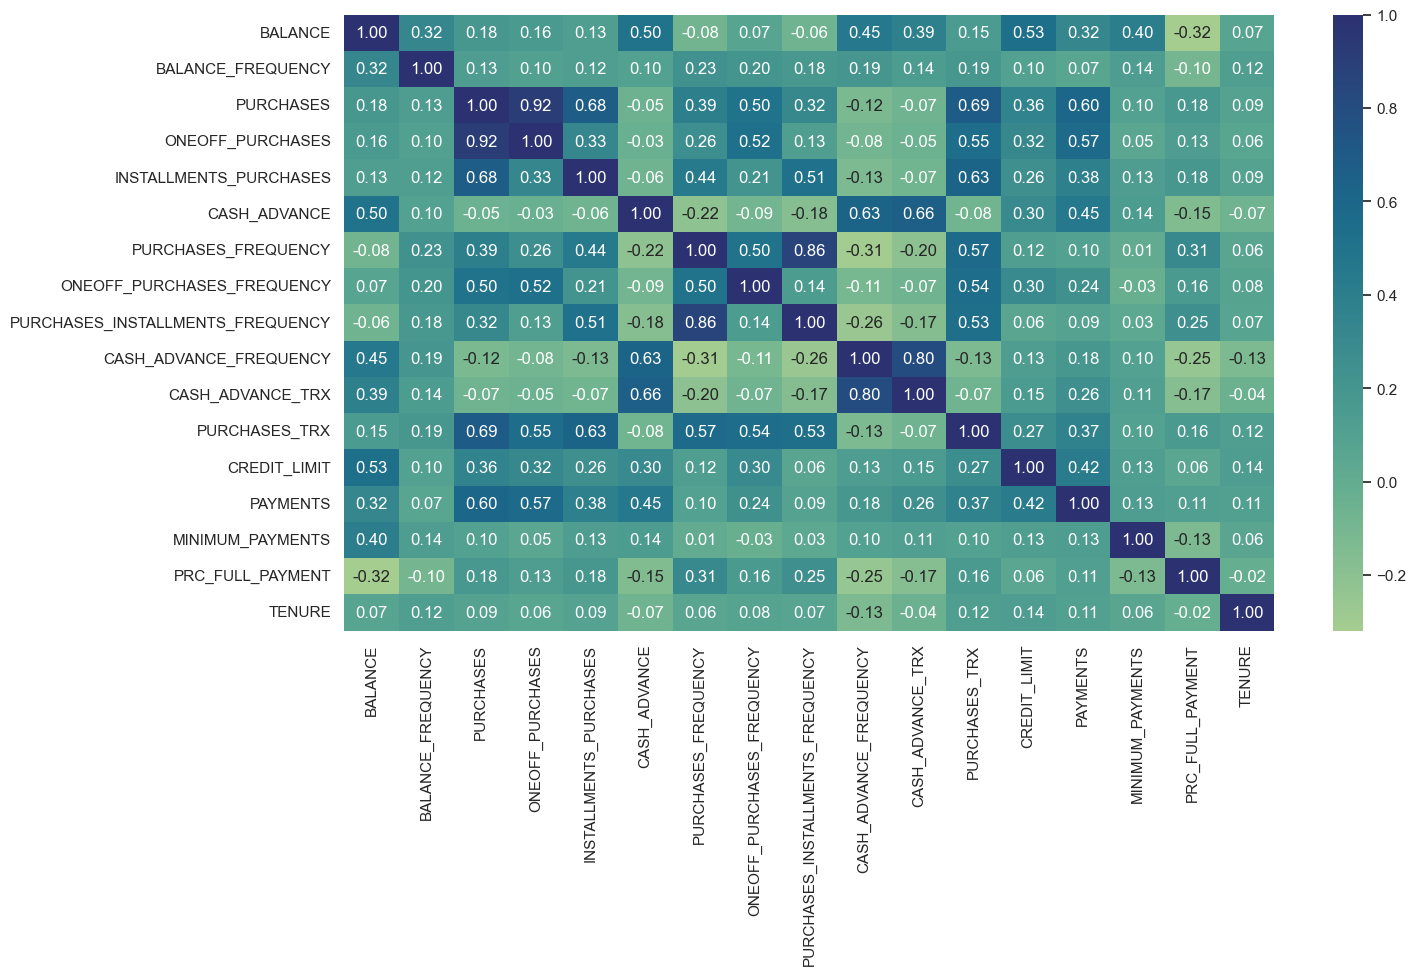

In [68]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_wo_na.corr(),annot=True, fmt=".2f", cmap="crest")

# K_Means

In [42]:
distance=[]
nb_classes=[]
for i in range(20):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(df_wo_na)
    distance.append(kmeans.inertia_)
    nb_classes.append(i+1)

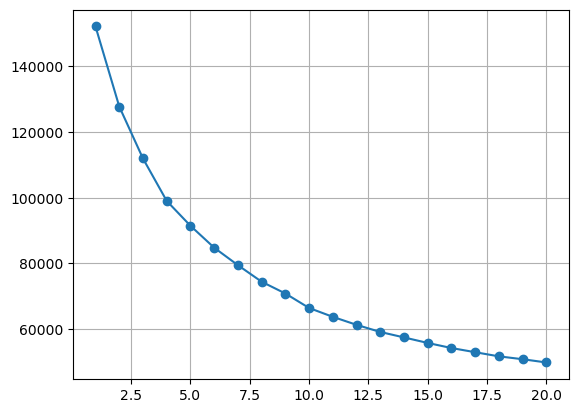

In [43]:
plt.plot(nb_classes,distance,marker='o')
plt.grid(True)

# K_means avec réduction de dimension avec une ACP

In [44]:
pca=PCA()
pca=pca.fit(df_wo_na)

In [45]:
pca.explained_variance_ratio_

array([2.73010064e-01, 2.03241866e-01, 8.82218368e-02, 7.48510696e-02,
       6.20469072e-02, 5.73573525e-02, 4.88190145e-02, 4.31003139e-02,
       3.78615418e-02, 3.07994481e-02, 2.37235281e-02, 1.77228258e-02,
       1.42735677e-02, 1.21704661e-02, 1.01289279e-02, 2.67058510e-03,
       6.85227936e-07])

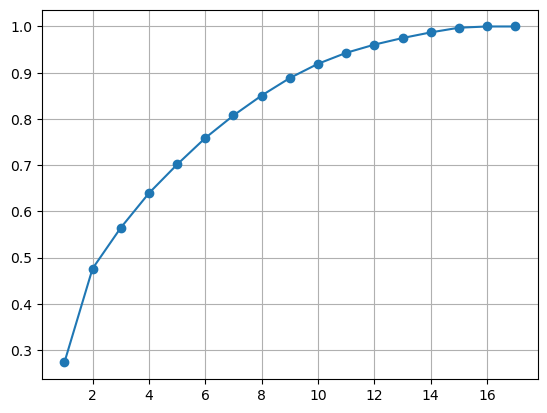

In [46]:
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(), marker='o')
plt.grid(True)

In [47]:
pca=PCA(n_components=7)
pca=pca.fit(df_wo_na)

In [48]:
score_pca=pca.transform(df_wo_na)

In [49]:
distance=[]
nb_classes=[]
for i in range(20):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(score_pca)
    distance.append(kmeans.inertia_)
    nb_classes.append(i+1)

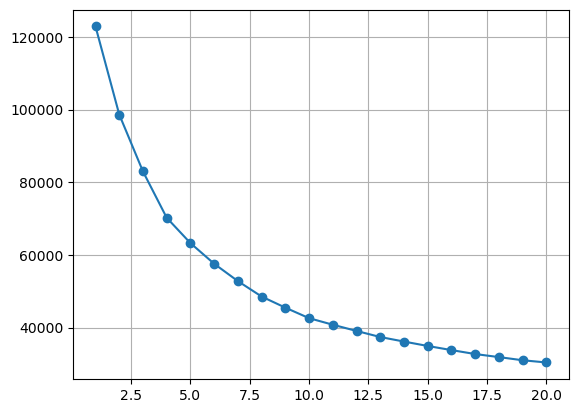

In [50]:
plt.plot(nb_classes,distance,marker='o')
plt.grid(True)

In [51]:
pca_to_kmeans=KMeans(n_clusters=4,random_state=0)
pca_to_kmeans=pca_to_kmeans.fit(score_pca)

In [52]:
tab_acp=pd.concat([df_wo_na.reset_index(drop=True),pd.DataFrame(score_pca)],axis=1)
tab_acp.columns.values[-7:]=['Composante 1','Composante 2','Composante 3','Composante 4','Composante 5',
                             'Composante 6','Composante 7']
tab_acp['cluster']=pca_to_kmeans.labels_

<AxesSubplot:xlabel='Composante 1', ylabel='Composante 2'>

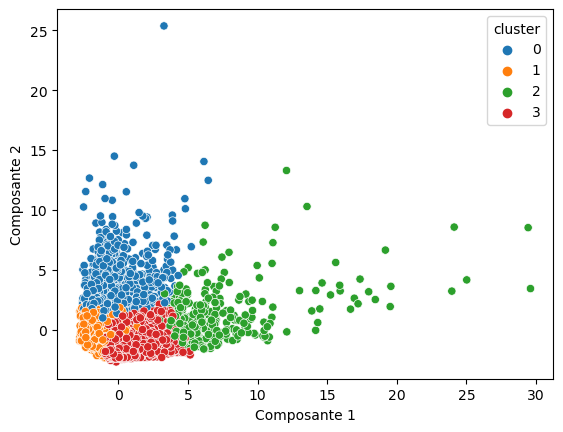

In [53]:
sns.scatterplot(x="Composante 1",y="Composante 2", hue="cluster",palette="tab10",data=tab_acp)
### graphe des clusters en fonctions des deux composantes principales

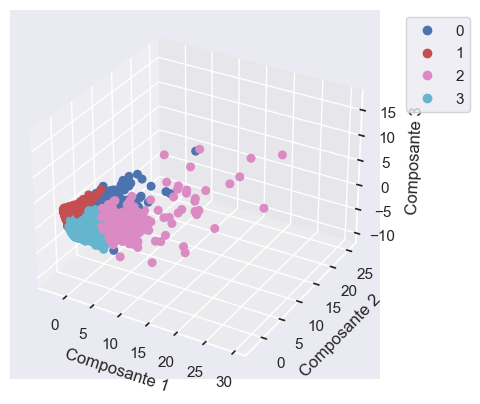

In [54]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette().as_hex())

x = tab_acp['Composante 1']
y = tab_acp['Composante 2']
z = tab_acp['Composante 3']
sc = ax.scatter(x, y, z, s=30, c=tab_acp["cluster"], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel("Composante 1")
ax.set_ylabel("Composante 2")
ax.set_zlabel("Composante 3")
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [58]:
sns.pairplot(tab_acp.iloc[:,-8:],hue="cluster",corner=True,palette="tab10")
## plus gobalement répartitions des classes en fonctions des composantes

In [55]:
r_= tab_acp[[c for c in tab_acp.columns if not c.startswith('Composante')]]
r_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960268   
1                   0.573963          0.110074      -0.591796      0.688712   
2                  -0.675349         -0.476070      -0.109020      0.826127   
3                  -0.258913         -0.329534      -0.551565      0.826127   
4                  -0.675349         -0.476070      -0.551565     -0.905302   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960268   
8946               -0.675349         -0.476070      -0.350408     -0.960268   
8947               -0.675349         -0.476070      -0.390639     -0.960268   
8948                0.157527         -0.182998      -0.591796     -1.097683   
8949                0.990398         -0.182998       0.333524     -0.905302   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0    -0.528979         -0.301634         -0.525551  0.360680        1  
1     0.818642          0.097930          0.234227  0.360680        0  
2    -0.383805         -0.092703         -0.525551  0.360680        3  
3    -0.598688         -0.274518         -0.525551  0.360680        1  
4    -0.364368         -0.256538         -0.525551  0.360680        1  
...        ...               ...               ...       ...      ...  
8945 -0.486217         -0.340451          1.183951 -4.122768        3  
8946 -0.503396         -0.340041         -0

In [60]:
# je vous déconseille de lancer cela,ça prend un temps fou je ne sais pas pourquoi, peut être trop de variable mais bon 17 ca me semble pas insurmontable

sns.pairplot(r_,hue="cluster",corner=True,palette="tab10")
### on va essayer de voir si on arrive à voir des tendances sur les labels avec les vraies variables et non les composantes
### on prend que les 100 premières obs car gourmand en temps

In [56]:
tab_acp.cluster.value_counts()

1    4031
3    3365
0    1219
2     335
Name: cluster, dtype: int64

# Interprétation des prédictions